In [1]:
import pandas as pd

In [2]:
datapath="D:\\jupyter 3.13\\cat_dog.csv"

In [3]:
df=pd.read_csv(datapath)

In [4]:
df

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1
...,...,...
24995,dog.12201.jpg,1
24996,dog.2893.jpg,1
24997,cat.12267.jpg,0
24998,dog.4380.jpg,1


In [5]:
import pandas as pd
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths
base_folder = r"D:\jupyter 3.13"
csv_file = os.path.join(base_folder, "cat_dog.csv")
image_folder = os.path.join(base_folder, "cat_dog")



In [6]:

df = pd.read_csv(csv_file)

# Step 2: Add a column with full paths to images
df['Image_Path'] = df['image'].apply(lambda x: os.path.join(image_folder, x))


In [7]:
df

,image,labels,Image_Path
0,dog.11289.jpg,1,D:\jupyter 3.13\cat_dog\dog.11289.jpg
1,cat.10836.jpg,0,D:\jupyter 3.13\cat_dog\cat.10836.jpg
2,cat.7970.jpg,0,D:\jupyter 3.13\cat_dog\cat.7970.jpg
3,cat.2212.jpg,0,D:\jupyter 3.13\cat_dog\cat.2212.jpg
4,dog.2653.jpg,1,D:\jupyter 3.13\cat_dog\dog.2653.jpg
...,...,...,...
24995,dog.12201.jpg,1,D:\jupyter 3.13\cat_dog\dog.12201.jpg
24996,dog.2893.jpg,1,D:\jupyter 3.13\cat_dog\dog.2893.jpg
24997,cat.12267.jpg,0,D:\jupyter 3.13\cat_dog\cat.12267.jpg
24998,dog.4380.jpg,1,D:\jupyter 3.13\cat_dog\dog.4380.jpg


In [10]:

def preprocess_image(image_path, target_size=(64, 64)):
    """Load an image, resize it, and normalize pixel values."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    return img_array



In [13]:
# Apply preprocessing to all images
df['Processed_Image'] = df['Image_Path'].apply(preprocess_image)


In [14]:
df


,image,labels,Image_Path,Processed_Image
0,dog.11289.jpg,1,D:\jupyter 3.13\cat_dog\dog.11289.jpg,"[[[0.28235295, 0.3647059, 0.19607843], [0.3019..."
1,cat.10836.jpg,0,D:\jupyter 3.13\cat_dog\cat.10836.jpg,"[[[0.16862746, 0.12156863, 0.12156863], [0.180..."
2,cat.7970.jpg,0,D:\jupyter 3.13\cat_dog\cat.7970.jpg,"[[[0.69411767, 0.69803923, 0.7176471], [0.7019..."
3,cat.2212.jpg,0,D:\jupyter 3.13\cat_dog\cat.2212.jpg,"[[[0.019607844, 0.015686275, 0.007843138], [0...."
4,dog.2653.jpg,1,D:\jupyter 3.13\cat_dog\dog.2653.jpg,"[[[0.8039216, 0.78431374, 0.77254903], [0.8078..."
...,...,...,...,...
24995,dog.12201.jpg,1,D:\jupyter 3.13\cat_dog\dog.12201.jpg,"[[[0.3372549, 0.59607846, 0.16470589], [0.3490..."
24996,dog.2893.jpg,1,D:\jupyter 3.13\cat_dog\dog.2893.jpg,"[[[0.9529412, 0.8352941, 0.73333335], [0.54901..."
24997,cat.12267.jpg,0,D:\jupyter 3.13\cat_dog\cat.12267.jpg,"[[[0.27058825, 0.23529412, 0.30980393], [0.278..."
24998,dog.4380.jpg,1,D:\jupyter 3.13\cat_dog\dog.4380.jpg,"[[[0.5019608, 0.44313726, 0.1882353], [0.47843..."


In [15]:
df[df['labels']==1]

,image,labels,Image_Path,Processed_Image
0,dog.11289.jpg,1,D:\jupyter 3.13\cat_dog\dog.11289.jpg,"[[[0.28235295, 0.3647059, 0.19607843], [0.3019..."
4,dog.2653.jpg,1,D:\jupyter 3.13\cat_dog\dog.2653.jpg,"[[[0.8039216, 0.78431374, 0.77254903], [0.8078..."
5,dog.3051.jpg,1,D:\jupyter 3.13\cat_dog\dog.3051.jpg,"[[[0.8, 0.80784315, 0.85490197], [0.8, 0.80784..."
9,dog.6482.jpg,1,D:\jupyter 3.13\cat_dog\dog.6482.jpg,"[[[0.23921569, 0.22352941, 0.21176471], [0.290..."
11,dog.624.jpg,1,D:\jupyter 3.13\cat_dog\dog.624.jpg,"[[[0.30980393, 0.25490198, 0.21176471], [0.286..."
...,...,...,...,...
24993,dog.1712.jpg,1,D:\jupyter 3.13\cat_dog\dog.1712.jpg,"[[[0.09019608, 0.078431375, 0.003921569], [0.0..."
24994,dog.5589.jpg,1,D:\jupyter 3.13\cat_dog\dog.5589.jpg,"[[[0.4745098, 0.44313726, 0.4862745], [0.32156..."
24995,dog.12201.jpg,1,D:\jupyter 3.13\cat_dog\dog.12201.jpg,"[[[0.3372549, 0.59607846, 0.16470589], [0.3490..."
24996,dog.2893.jpg,1,D:\jupyter 3.13\cat_dog\dog.2893.jpg,"[[[0.9529412, 0.8352941, 0.73333335], [0.54901..."


In [16]:
df[df['labels']==0]

,image,labels,Image_Path,Processed_Image
1,cat.10836.jpg,0,D:\jupyter 3.13\cat_dog\cat.10836.jpg,"[[[0.16862746, 0.12156863, 0.12156863], [0.180..."
2,cat.7970.jpg,0,D:\jupyter 3.13\cat_dog\cat.7970.jpg,"[[[0.69411767, 0.69803923, 0.7176471], [0.7019..."
3,cat.2212.jpg,0,D:\jupyter 3.13\cat_dog\cat.2212.jpg,"[[[0.019607844, 0.015686275, 0.007843138], [0...."
6,cat.6006.jpg,0,D:\jupyter 3.13\cat_dog\cat.6006.jpg,"[[[0.40392157, 0.34509805, 0.3647059], [0.4078..."
7,cat.3234.jpg,0,D:\jupyter 3.13\cat_dog\cat.3234.jpg,"[[[0.09803922, 0.105882354, 0.101960786], [0.0..."
...,...,...,...,...
24990,cat.11308.jpg,0,D:\jupyter 3.13\cat_dog\cat.11308.jpg,"[[[0.16862746, 0.19607843, 0.22745098], [0.286..."
24991,cat.5956.jpg,0,D:\jupyter 3.13\cat_dog\cat.5956.jpg,"[[[0.79607844, 0.79607844, 0.8039216], [0.8235..."
24992,cat.7184.jpg,0,D:\jupyter 3.13\cat_dog\cat.7184.jpg,"[[[0.9372549, 0.9372549, 0.9372549], [0.964705..."
24997,cat.12267.jpg,0,D:\jupyter 3.13\cat_dog\cat.12267.jpg,"[[[0.27058825, 0.23529412, 0.30980393], [0.278..."


In [ ]:
#dataset is balance

In [17]:
X = np.array(df['Processed_Image'].tolist())  # Convert processed images to numpy array
y = to_categorical(df['labels'], num_classes=2) 

In [18]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


In [ ]:
#Good Model

Epoch 1/50
625/625 [==============================] - 214s 340ms/step - loss: 1.0410 - accuracy: 0.6344 - val_loss: 0.7320 - val_accuracy: 0.5540 - lr: 0.0010
Epoch 2/50
625/625 [==============================] - 223s 357ms/step - loss: 0.5833 - accuracy: 0.7167 - val_loss: 1.3237 - val_accuracy: 0.5104 - lr: 0.0010
Epoch 3/50
625/625 [==============================] - 220s 352ms/step - loss: 0.5351 - accuracy: 0.7551 - val_loss: 0.8779 - val_accuracy: 0.6110 - lr: 0.0010
Epoch 4/50
625/625 [==============================] - 212s 339ms/step - loss: 0.5020 - accuracy: 0.7780 - val_loss: 0.7534 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 5/50
625/625 [==============================] - 211s 338ms/step - loss: 0.4444 - accuracy: 0.8158 - val_loss: 0.4304 - val_accuracy: 0.8130 - lr: 5.0000e-04
Epoch 6/50
625/625 [==============================] - 788s 1s/step - loss: 0.4205 - accuracy: 0.8288 - val_loss: 1.1630 - val_accuracy: 0.5552 - lr: 5.0000e-04
Epoch 7/50
625/625 [=====================

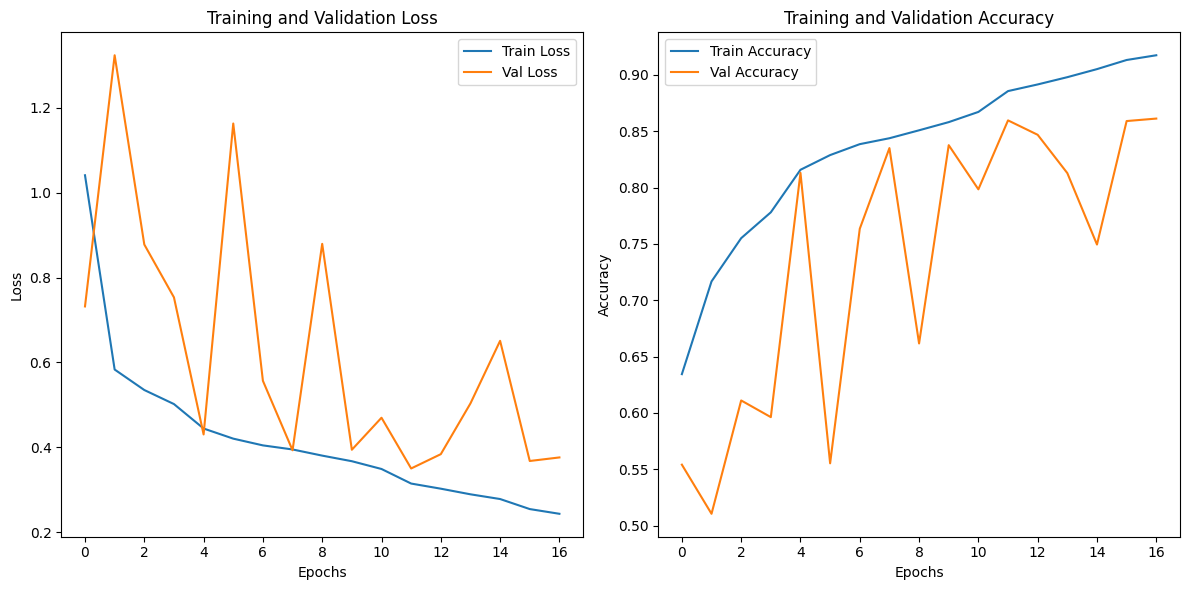

In [64]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Model definition
model = models.Sequential([
    layers.InputLayer(input_shape=(64, 64, 3)),
    layers.Conv2D(64, (3, 3), kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.ReLU(),  # Using ReLU after batch norm
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.4),
    layers.Dense(2, activation='sigmoid')
])

# Compile model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with callbacks and save the history
history = model.fit(X_train,y_train,
    validation_data=(X_test,y_test), epochs=50, callbacks=[lr_scheduler, early_stopping])

# Access history object to plot training progress
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#high accuracy but overfit model

In [72]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = models.Sequential([
    layers.InputLayer(input_shape=(64, 64, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.GlobalAveragePooling2D(),  # Use GlobalAveragePooling2D instead of Flatten
    
    layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='sigmoid')  # For binary classification; for multi-class, use softmax
])

# Compile model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate reduction and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    
    

# Train model with callbacks and save the history
history = model.fit(X_train,y_train,
    validation_data=(X_test,y_test), epochs=50, callbacks=[lr_scheduler, early_stopping])


Epoch 1/50
625/625 [==============================] - 239s 375ms/step - loss: 1.7891 - accuracy: 0.6854 - val_loss: 0.6160 - val_accuracy: 0.6940 - lr: 0.0010
Epoch 2/50
625/625 [==============================] - 224s 358ms/step - loss: 0.4796 - accuracy: 0.8054 - val_loss: 0.6470 - val_accuracy: 0.6448 - lr: 0.0010
Epoch 3/50
625/625 [==============================] - 123s 197ms/step - loss: 0.3911 - accuracy: 0.8564 - val_loss: 0.4035 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 4/50
625/625 [==============================] - 117s 187ms/step - loss: 0.3371 - accuracy: 0.8822 - val_loss: 0.3680 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 5/50
625/625 [==============================] - 119s 191ms/step - loss: 0.2933 - accuracy: 0.9069 - val_loss: 0.3891 - val_accuracy: 0.8558 - lr: 0.0010
Epoch 6/50
625/625 [==============================] - 112s 180ms/step - loss: 0.2534 - accuracy: 0.9235 - val_loss: 0.3530 - val_accuracy: 0.8764 - lr: 0.0010
Epoch 7/50
625/625 [==========================